Download caltech101 data

link : https://drive.google.com/uc?id=137RyRjvTBkBiIfeYBNZBtViDHQ6_Ewsp 

In [11]:
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from PIL import Image
from fine_tune.data import Caltech101Dataset
from itertools import islice

# Define the transformations you want to apply to each image
# Here we are resizing the images to 224x224 (common for models like ResNet),
# converting them to a tensor and normalizing with mean and std dev values that are standard for ImageNet pre-trained models
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Instantiate the dataset with the directory and the transform
dataset = Caltech101Dataset(r'C:\Users\sisun\VSCode\FinetuningExample\src\fine_tune\caltech101', transform=transform)

# Create a DataLoader to iterate over the dataset
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Now you can use the dataloader in your training loop


In [12]:
from fine_tune.data import create_category_mapping

index_to_category, category_to_index = create_category_mapping("fine_tune/caltech101")

def head(d, num=5):
    return dict(islice(d.items(), num))

head(index_to_category), head(category_to_index)

({0: 'BACKGROUND_Google',
  1: 'Faces',
  2: 'Faces_easy',
  3: 'Leopards',
  4: 'Motorbikes'},
 {'BACKGROUND_Google': 0,
  'Faces': 1,
  'Faces_easy': 2,
  'Leopards': 3,
  'Motorbikes': 4})

In [14]:
for batch in dataloader:
    break

batch[0].min(), batch[0].max()

(tensor(-2.1179), tensor(2.6400))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


llama


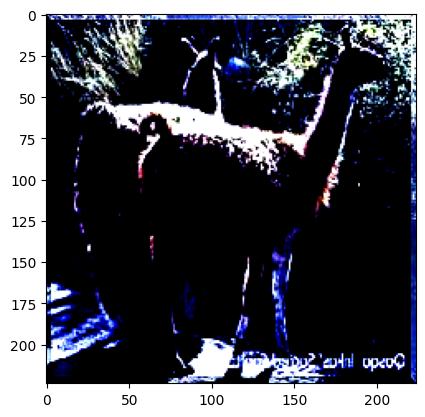

In [15]:
import matplotlib.pyplot as plt
print(index_to_category[batch[1][0].item()])
plt.imshow(batch[0][0].permute(1, 2, 0))